In [1]:
# 0 - fake
# 1 - real
#This version takes 33% as testing data

In [2]:
# read dataset
import pandas as pd
data = pd.read_csv('/Users/ellen/OneDrive/Documents/Python/archive/WELFake_Dataset.csv')
data.head() #show columns

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [3]:
data.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [4]:
data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [5]:
data = data.dropna()
print("Original DataFrame shape:", data.shape)
print("New DataFrame shape:", data.shape)
data.isnull().sum()

Original DataFrame shape: (71537, 4)
New DataFrame shape: (71537, 4)


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
data.label.value_counts()

label
1    36509
0    35028
Name: count, dtype: int64

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [8]:
# Combining title and text
data['content'] = data['title'] + ' ' + data['text']

# Drop rows with missing values
data.dropna(inplace=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['label'], test_size=0.33, random_state=52)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Assuming X_train is a column of text data
t_vectorizer = TfidfVectorizer()
X_train_tfidf = t_vectorizer.fit_transform(X_train)

model = LogisticRegression(solver='saga', max_iter=3000)

# Create a pipeline with explicit steps
pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('logreg', model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logreg', LogisticRegression(max_iter=3000, solver='saga'))])

In [11]:
# Access the TfidfVectorizer from the pipeline
tfidf_vectorizer = pipeline.named_steps['tfidf']

# Transform the test data using the trained vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Predict using the logistic regression model
predicted = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predicted))
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", round(accuracy * 100), '%')
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     11582
           1       0.94      0.95      0.95     12026

    accuracy                           0.95     23608
   macro avg       0.95      0.95      0.95     23608
weighted avg       0.95      0.95      0.95     23608

Accuracy: 95 %
Accuracy: 0.9479837343273466


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [13]:
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[10907   675]
 [  553 11473]]


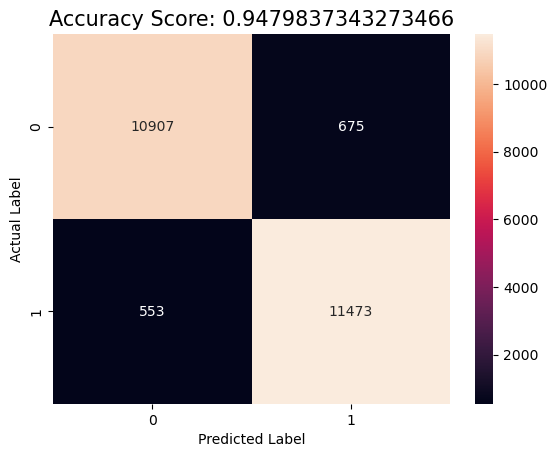

In [14]:
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot = True, fmt = '')
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
# plt.title('Confusion Matrix')
all_sample_title  = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
plt.show()

In [15]:
def predict_fake_news(news):
    prediction = model.predict(tfidf_vectorizer.transform([news]))  # This is a 2D array

    return 'Fake' if prediction[0] == 0 else 'Real'

# Example usage
example_news = "SATAN 2: Russia unveils an image of its terrifying new nuclear missile"
predicted_label = predict_fake_news(example_news)
print(predicted_label)

Real


In [16]:
print(predict_fake_news("A solar flare could leave the world without internet in 2024"))

Real


In [17]:
print(predict_fake_news("Trump tussle gives unpopular Mexican leader much-needed shot in arm"))

Real


In [18]:
print(predict_fake_news("Satellite imagery shows more than 500 bomb craters in Gaza"))

Real


In [19]:
print(predict_fake_news("Trump urged Michigan officials not to certify 2020 vote"))

Real


In [20]:
print(predict_fake_news("India won the fifa worldcup."))

Real


In [21]:
print(predict_fake_news("Trump to nominate former NASA chief Griffin for defense undersecretary"))

Real


In [22]:
print(predict_fake_news("WASHINGTON (Reuters) - U.S. President Donald Trump intends to nominate Michael Griffin, a former administrator of the National Aeronautics and Space Administration (NASA), as undersecretary of defense for research and engineering, the White House said on Monday. The White House had said in October that Trump intended to tap Griffin for principal deputy undersecretary of defense for acquisition, technology, and logistics. Mondayâ€™s announcement did not give a reason for the change. Griffin most recently served as chairman and chief executive officer of the Schafer Corporation, a provider of scientific, engineering, and technical services and products in the national security sector, the White House said. He held the top NASA job from 2005 to 2009. "))

Fake
